In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
%matplotlib inline

In [55]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


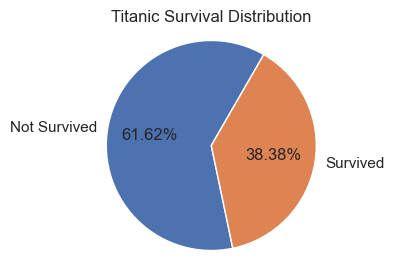

In [58]:
survived_counts = train_data['Survived'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 3))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.2f%%', startangle=60)
plt.title('Titanic Survival Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [59]:
train_nan = train_data[train_data.isna()].count()
test_nan = test_data[test_data.isna()].count()

# Create a DataFrame to display the missing value counts side by side
nan = pd.DataFrame({'Train ': train_nan, 'Test': test_nan})

# Print the DataFrame
print(nan)

             Train   Test
Age               0   0.0
Cabin             0   0.0
Embarked          0   0.0
Fare              0   0.0
Name              0   0.0
Parch             0   0.0
PassengerId       0   0.0
Pclass            0   0.0
Sex               0   0.0
SibSp             0   0.0
Survived          0   NaN
Ticket            0   0.0


In [60]:
train_missing_counts = train_data.isnull().sum()
test_missing_counts = test_data.isnull().sum()

missing_counts_df = pd.DataFrame({'Train': train_missing_counts, 'Test': test_missing_counts})

# Print the DataFrame
print(missing_counts_df)

             Train   Test
Age            177   86.0
Cabin          687  327.0
Embarked         2    0.0
Fare             0    1.0
Name             0    0.0
Parch            0    0.0
PassengerId      0    0.0
Pclass           0    0.0
Sex              0    0.0
SibSp            0    0.0
Survived         0    NaN
Ticket           0    0.0


In [61]:
# As there are more null values in cabin we are dropping that column
train_data = train_data.drop(['Cabin'], axis=1)
test_data=test_data.drop(['Cabin'],axis=1)

<Axes: ylabel='Age'>

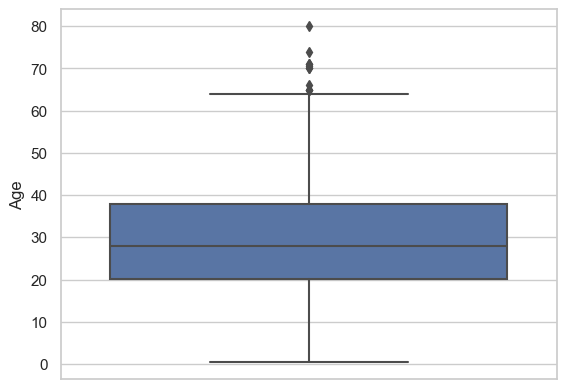

In [62]:
sns.boxplot(y=train_data["Age"])

In [63]:
def null_Age(df, colname):
    mean = df['Age'].mean()
    sd = df['Age'].std()
    def fill_empty(x):
        if np.isnan(x):
            return np.random.randint(mean-sd, mean+sd, ())
        return x
    return df[colname].apply(fill_empty).astype(int)
train_data['Age'] = null_Age(train_data, 'Age')
test_data['Age']=null_Age(test_data, 'Age')

In [64]:
def null_embarked(df, colname):
    
    return df[colname].fillna('C')
    
train_data['Embarked'] = null_embarked(train_data, 'Embarked')

train_data.isnull().sum()
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [65]:
def create_category(data, colname):
    data['Category'] = data[colname]
    for i in range(len(data['Name'])):
        if 'Mrs' in data['Name'][i]:
            data.loc[i, 'Category'] = 'Mrs'
        elif 'Mr' in data['Name'][i]:
            data.loc[i, 'Category'] = 'Mr'
        elif 'Miss' in data['Name'][i]:
            data.loc[i, 'Category'] = 'Miss'
        elif 'Master' in data['Name'][i]:
            data.loc[i, 'Category'] = 'Master'
        elif data['Sex'][i] == 'male':
            data.loc[i, 'Category'] = 'Mr'
        elif data['Sex'][i] == 'female':
            data.loc[i, 'Category'] = 'Mrs'

    return data



train_data = create_category(train_data, colname='Name')
test_data = create_category(test_data, colname='Name')

In [66]:
train_data.drop('Name', axis = 1, inplace = True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Category
0,1,0,3,male,22,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,female,38,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,female,35,1,0,113803,53.1000,S,Mrs
4,5,0,3,male,35,0,0,373450,8.0500,S,Mr


In [67]:
len(train_data.Ticket.unique())

681

In [68]:
train_data = train_data.drop(['Ticket'], axis=1)

In [69]:
test_data = test_data.drop(['Ticket'], axis=1)

In [70]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
0,1,0,3,male,22,1,0,7.2500,S,Mr
1,2,1,1,female,38,1,0,71.2833,C,Mrs
2,3,1,3,female,26,0,0,7.9250,S,Miss
3,4,1,1,female,35,1,0,53.1000,S,Mrs
4,5,0,3,male,35,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,S,Mr
887,888,1,1,female,19,0,0,30.0000,S,Miss
888,889,0,3,female,31,1,2,23.4500,S,Miss
889,890,1,1,male,26,0,0,30.0000,C,Mr


In [71]:
mean_fare = train_data['Fare'].mean()

# Replace missing values in the 'Fare' column with the mean
test_data['Fare'].fillna(mean_fare, inplace=True)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Category       0
dtype: int64

In [72]:
test_data.drop('Name', axis = 1, inplace = True)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
0,892,3,male,34,0,0,7.8292,Q,Mr
1,893,3,female,47,1,0,7.0000,S,Mrs
2,894,2,male,62,0,0,9.6875,Q,Mr
3,895,3,male,27,0,0,8.6625,S,Mr
4,896,3,female,22,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,34,0,0,8.0500,S,Mr
414,1306,1,female,39,0,0,108.9000,C,Mrs
415,1307,3,male,38,0,0,7.2500,S,Mr
416,1308,3,male,25,0,0,8.0500,S,Mr


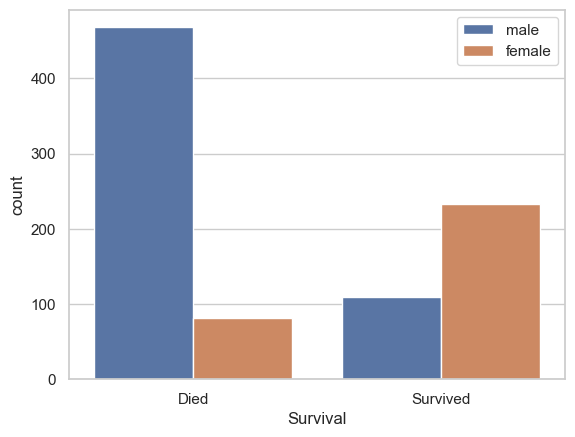

In [73]:
g = sns.countplot(data=train_data, x='Survived', hue='Sex')
sns.set(style="whitegrid")
# Add a legend to the plot
plt.legend(loc='upper right')

# Set labels and xticklabels
g.set(xlabel="Survival", xticklabels=["Died", "Survived"])

# Show the plot
plt.show()

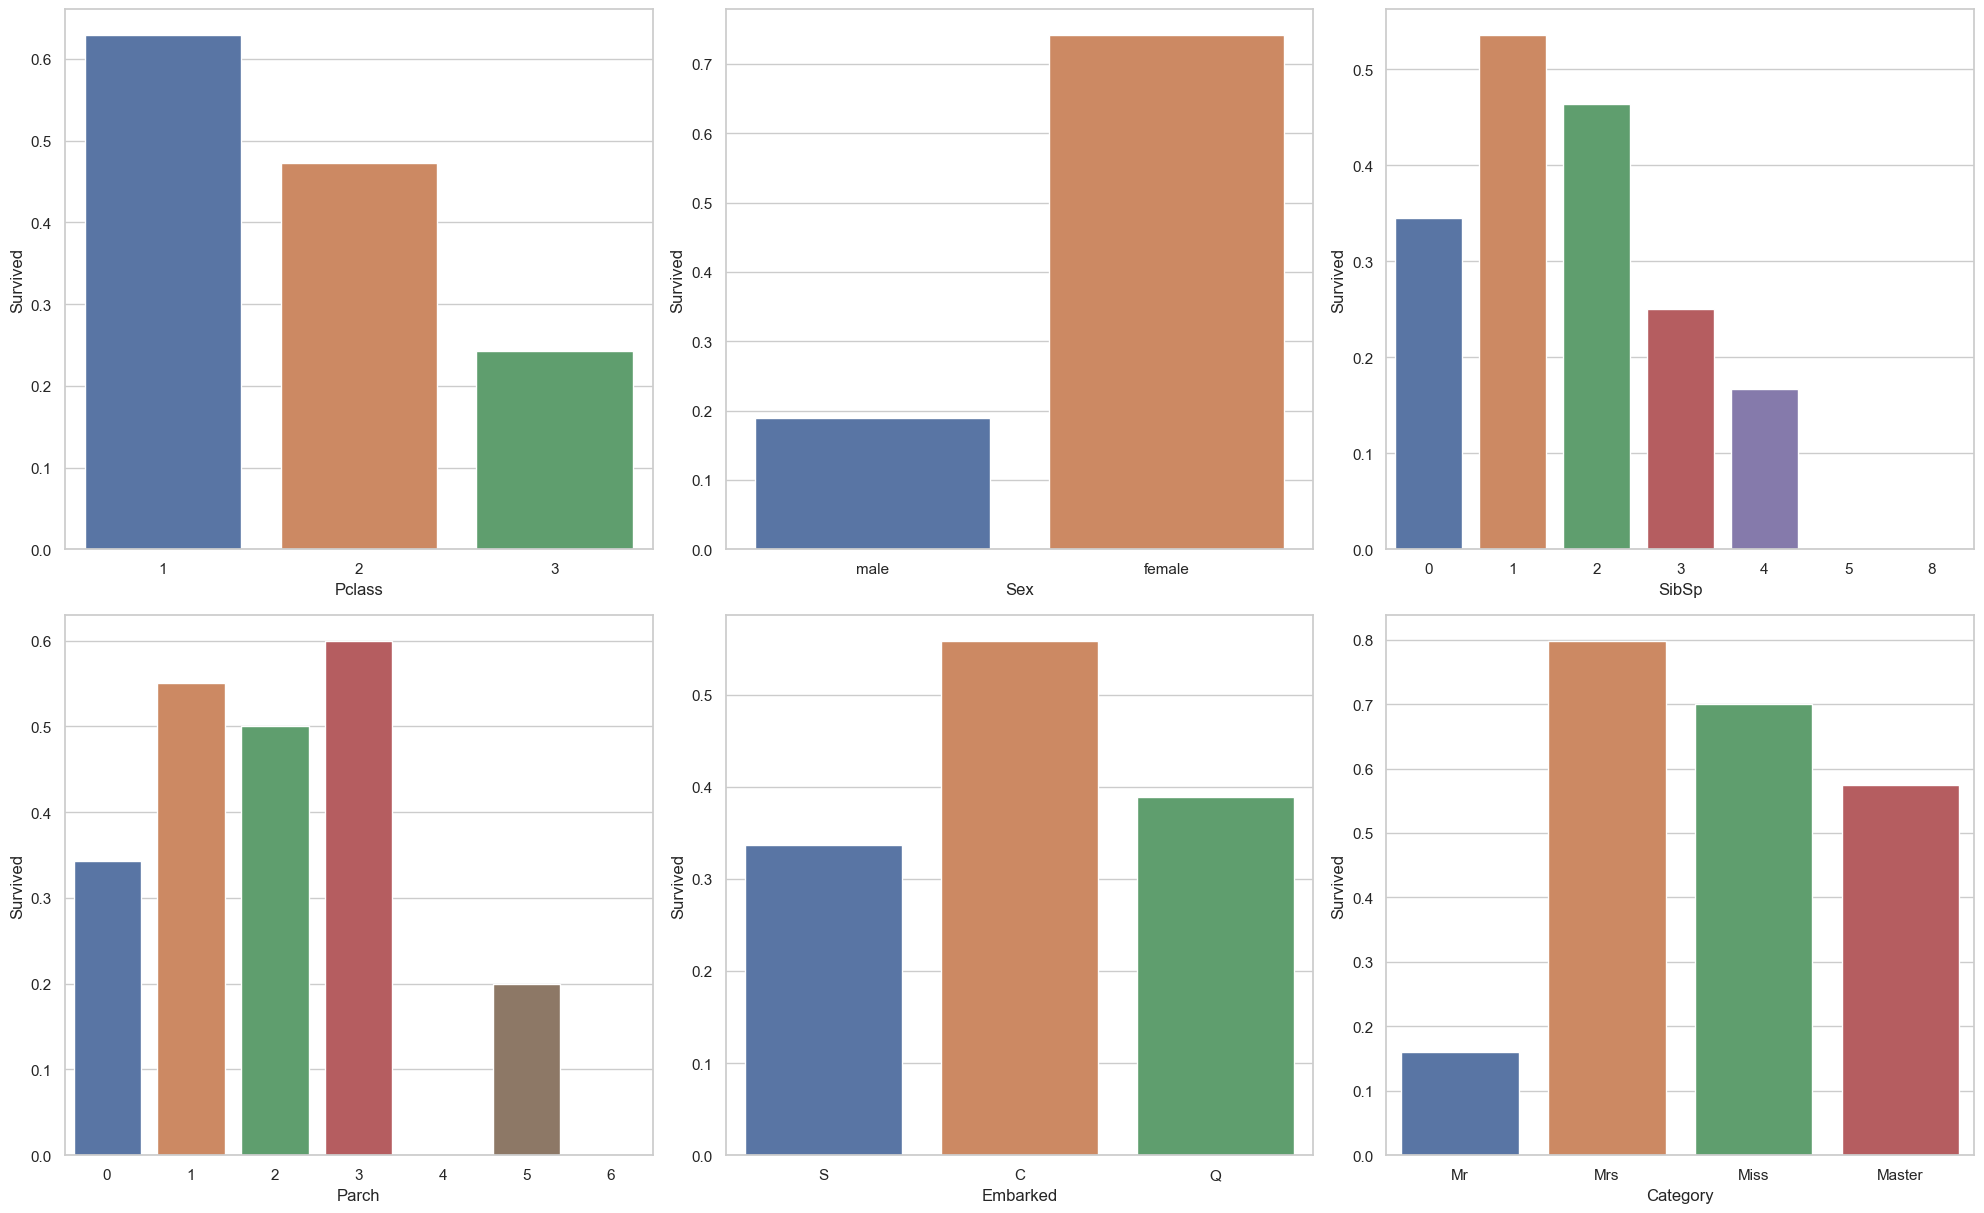

In [74]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(style="whitegrid")
# Set the figure size
plt.figure(figsize=(20, 30))
plotnumber = 1

# Create an empty list to hold the legend labels
legend_labels = []

for i in train_data.columns.drop(['Survived', 'Age', 'Fare', 'PassengerId']):
    plt.subplot(5, 3, plotnumber)
    sns.barplot(x=i, y='Survived', data=train_data,ci=None)
    plt.xlabel(i)
    plt.ylabel('Survived')
    plotnumber += 1
# Show the plots
plt.tight_layout()
plt.show()


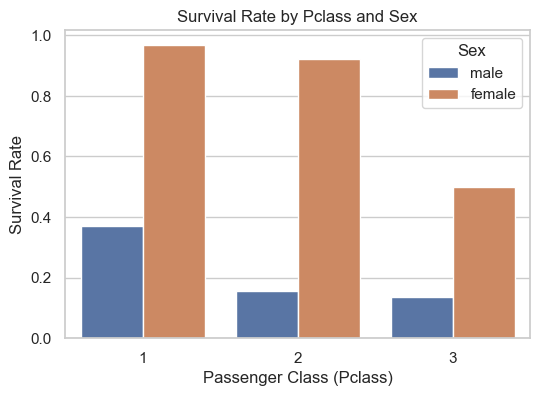

In [75]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data, ci=None)  # Set ci parameter to None to remove error bars

# Add labels and a title
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Pclass and Sex")

# Show the plot
plt.show()


In [76]:
def add_attribute(df):
    age_group = [] 
    for i in df['Age']: 
        if i <= 12:
            age_group.append('Children')
        elif i <= 30: 
            age_group.append('Youth') 
        elif i <= 50: 
            age_group.append('Middle-aged') 
        else: 
            age_group.append('Senior') 
    return age_group
train_data['Age_group']=add_attribute(train_data)
test_data['Age_group']=add_attribute(test_data)

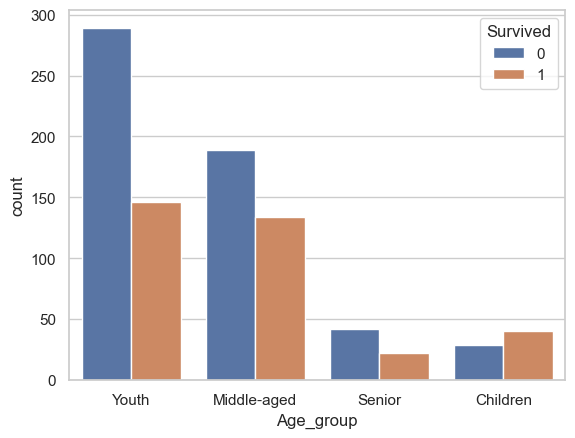

In [77]:
sns.set(style="whitegrid")

# Create a countplot to visualize the relationship between 'Age_group' and 'survived'
sns.countplot(x='Age_group', hue='Survived', data=train_data)

plt.show()

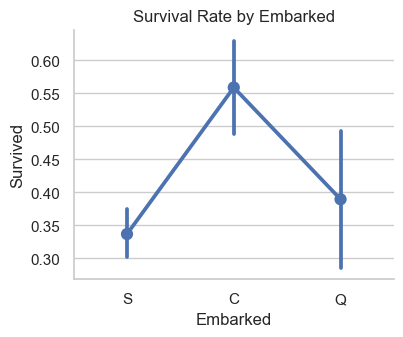

In [78]:
sns.catplot(data=train_data, x='Embarked', y='Survived', kind='point')
fig=plt.gcf()
fig.set_size_inches(4,3)
plt.title('Survival Rate by Embarked') 
plt.show()

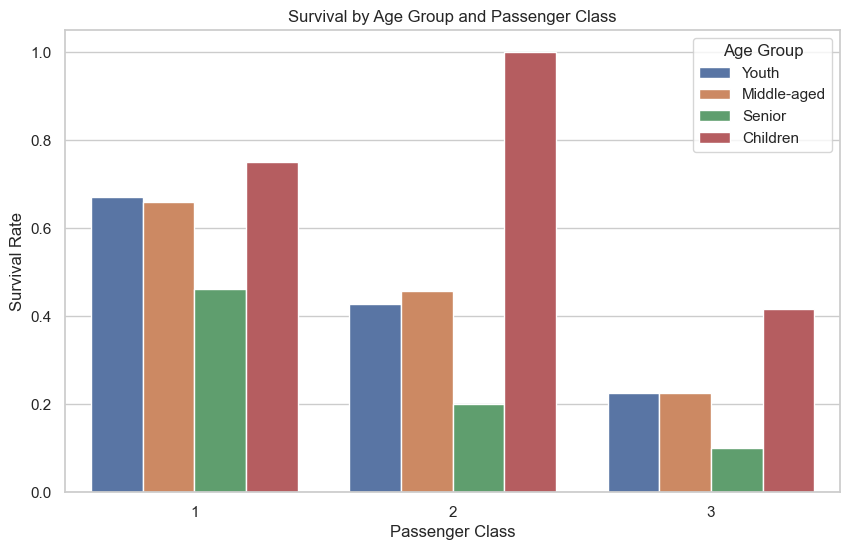

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Age_group', data=train_data,ci=None)
plt.title('Survival by Age Group and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Age Group')

plt.show()

In [81]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female' :1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female' :1})

In [82]:
train_data['Embarked'] = train_data.Embarked.replace({'S': 0, 'C' : 1, 'Q' : 2})
train_data['Category'] = train_data.Category.replace({'Miss': 1, 'Mrs':2, 'Mr':3, 'Master':4})
train_data['Age_group'].replace(['Children','Youth','Middle-aged','Senior'],[0,1,2,3],inplace=True)
test_data['Embarked'] = test_data.Embarked.replace({'S': 0, 'C' : 1, 'Q' : 2})
test_data['Category'] = test_data.Category.replace({'Miss': 1, 'Mrs':2, 'Mr':3, 'Master':4})
test_data['Age_group'].replace(['Children','Youth','Middle-aged','Senior'],[0,1,2,3],inplace=True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category,Age_group
0,1,0,3,0,22,1,0,7.2500,0,3,1
1,2,1,1,1,38,1,0,71.2833,1,2,2
2,3,1,3,1,26,0,0,7.9250,0,1,1
3,4,1,1,1,35,1,0,53.1000,0,2,2
4,5,0,3,0,35,0,0,8.0500,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13.0000,0,3,1
887,888,1,1,1,19,0,0,30.0000,0,1,1
888,889,0,3,1,31,1,2,23.4500,0,1,2
889,890,1,1,0,26,0,0,30.0000,1,3,1


In [83]:
X_train = train_data.drop(columns=['Survived'])
y_train = train_data['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [84]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}

results = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    
    result_df = pd.DataFrame({
        "Classifier": [name],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1 Score": [f1]
    })
    
    results.append(result_df)

results_df = pd.concat(results, ignore_index=True)

print(results_df)

            Classifier  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.798883   0.771429  0.729730  0.750000
1          Naive Bayes  0.709497   0.683333  0.554054  0.611940
2        Decision Tree  0.754190   0.720588  0.662162  0.690141
3        Random Forest  0.804469   0.791045  0.716216  0.751773
4                  SVM  0.597765   0.666667  0.054054  0.100000


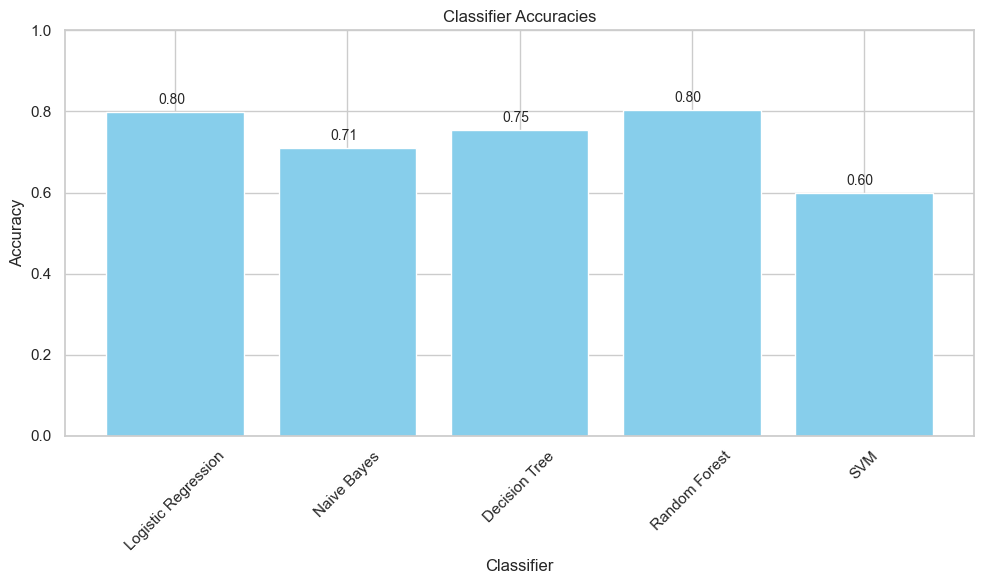

In [85]:
results_df = pd.concat(results, ignore_index=True)

plt.figure(figsize=(10, 6))
bars = plt.bar(results_df["Classifier"], results_df["Accuracy"], color='skyblue')
plt.title('Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)  

plt.xticks(rotation=45)  

for bar, accuracy in zip(bars, results_df["Accuracy"]):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{accuracy:.2f}', fontsize=10)

plt.tight_layout()

plt.show()



In [86]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
if 'Survived' in test_data:
    test_data = test_data.drop(columns=['Survived'])
test_predictions = model.predict(test_data)

test_data['Survived'] = test_predictions

# Save the test_data with the predicted 'survived' column
test_data.to_csv('predicted_test_data.csv', index=False)


In [87]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category,Age_group,Survived
0,892,3,0,34,0,0,7.8292,2,3,2,0
1,893,3,1,47,1,0,7.0000,0,2,2,0
2,894,2,0,62,0,0,9.6875,2,3,3,0
3,895,3,0,27,0,0,8.6625,0,3,1,0
4,896,3,1,22,1,1,12.2875,0,2,1,1


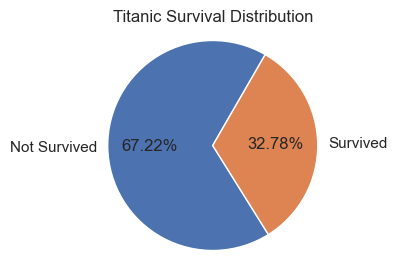

In [88]:
survived_counts = test_data['Survived'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 3))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.2f%%', startangle=60)
plt.title('Titanic Survival Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()